In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
wine_quality_red=pd.read_csv('C:/Users/Hp/Downloads/winequality-red.csv',sep=';')

In [3]:
wine_quality_white=pd.read_csv('C:/Users/Hp/Downloads/winequality-white.csv',sep=';')

In [4]:
wine_quality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_quality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine_quality_red.insert(12,'Wine Type','red')

In [7]:
wine_quality_white.insert(12,'Wine Type','white')

In [8]:
wine_quality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [9]:
wine_quality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
wine_quality=pd.concat([wine_quality_red,wine_quality_white],ignore_index=True)
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [11]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine Type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Up to here, I united to dataset for wine quality which were seperated as white and red. To not confuse which wine it is, i added a column named 'Wine Type' and i will use this column as a target variable for classification. As for regression part, i will use Quality part.

From here, I will turn Wine Type column into integer using labelencoder.

In [12]:
from sklearn import preprocessing

In [13]:
labelencoder=preprocessing.LabelEncoder()

In [14]:
wine_quality['Wine Type']=labelencoder.fit_transform(wine_quality['Wine Type'])

In [15]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


Now let us look at the correlation matrix.

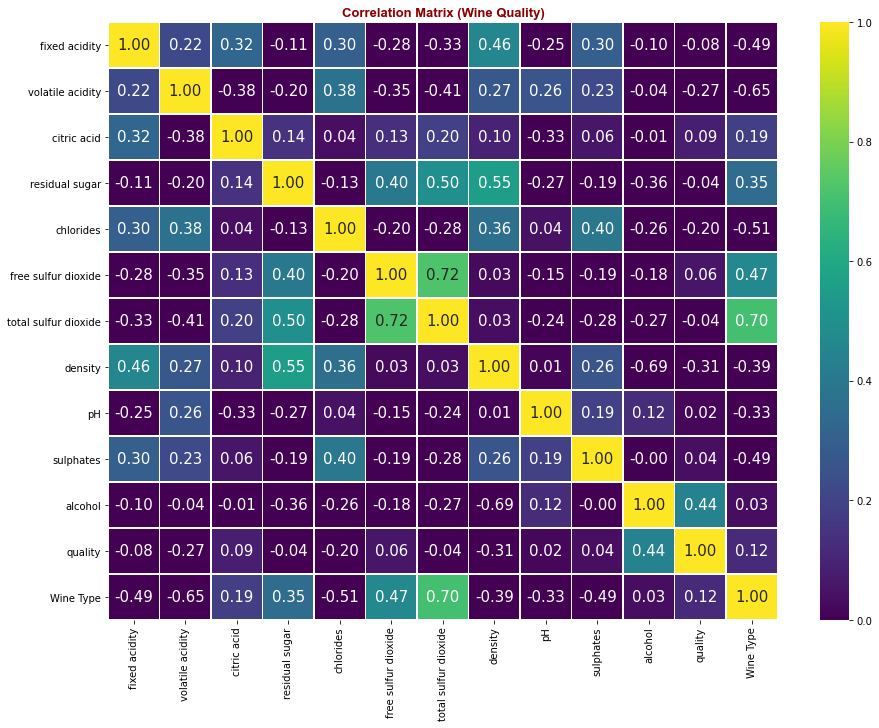

In [16]:
plt.figure(figsize=(15,11))
sns.heatmap(wine_quality.corr(), annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Wine Quality)", fontdict=title_font)

plt.show()

We can see from the heatmap that total sulfur dioxide is highly correlated with wine type and free sulfur dioxide. This might cause problem in our model so i will exlude that feature from dataset.

In [17]:
wine_quality.drop(['total sulfur dioxide'],axis=1,inplace=True)

So, we see that red=0 and white=1

First,let us look whether our data is imbalanced or not.

White Wine ratio : %75.39
Red Wine ratio     : %24.61


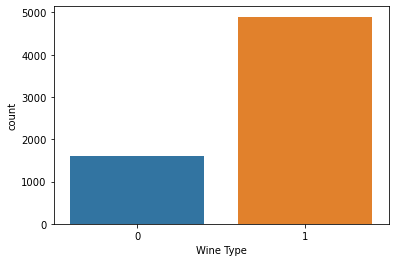

In [18]:
sns.countplot(wine_quality['Wine Type'])

print("White Wine ratio : %{:.2f}".format(sum(wine_quality['Wine Type'])/len(wine_quality['Wine Type'])*100))
print("Red Wine ratio     : %{:.2f}".format((len(wine_quality['Wine Type'])-sum(wine_quality['Wine Type']))/len(wine_quality['Wine Type'])*100))

So we can see that there is more data for white wine than red wine. Now let us overcome this issue.

First let us look our model without any algorithm

In [19]:
X_type=wine_quality.drop(['Wine Type','quality'],axis=1)
y_type=wine_quality['Wine Type']

Now here, i split my data as train and test and from now on, i will try to apply algortihms without changing the test data.

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_type,y_type,test_size=0.2,random_state=0)

In [21]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5197, 10)
Number transactions y_train dataset:  (5197,)
Number transactions X_test dataset:  (1300, 10)
Number transactions y_test dataset:  (1300,)


In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)

print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
print("Train Dataset")
print(classification_report(y_train, predictions_train))
print("Test Dataset")
print(classification_report(y_test, predictions_test))

Accuracy : 0.96

Train Dataset
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1288
           1       0.98      0.98      0.98      3909

    accuracy                           0.97      5197
   macro avg       0.96      0.95      0.96      5197
weighted avg       0.97      0.97      0.97      5197

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       311
           1       0.97      0.98      0.97       989

    accuracy                           0.96      1300
   macro avg       0.95      0.94      0.94      1300
weighted avg       0.96      0.96      0.96      1300



As expected, results are a little bit higher for white wine.

First let us try resampling algorithms.

In [23]:
from sklearn.utils import resample

In [24]:
white_wine=wine_quality[wine_quality['Wine Type']==1]
red_wine=wine_quality[wine_quality['Wine Type']==0]

red_wine_upsampled = resample(red_wine,
                                         replace = True,
                                         n_samples = len(white_wine),
                                         random_state = 111)

upsampled_df = pd.concat([white_wine, red_wine_upsampled])
upsampled_df['Wine Type'].value_counts()

0    4898
1    4898
Name: Wine Type, dtype: int64

In [25]:
X_upsampled = upsampled_df.drop(['Wine Type','quality'], axis=1)
y_upsampled = upsampled_df['Wine Type']
X_train_up,X_test_up,y_train_up,y_test_up=train_test_split(X_upsampled,y_upsampled,test_size=0.2,random_state=0)
lr.fit(X_train_up, y_train_up)
predictions_train_up = lr.predict(X_train_up)
predictions_test_up = lr.predict(X_test)
print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
print("Train Dataset")
print(classification_report(y_train_up, predictions_train_up))
print("Test Dataset")
print(classification_report(y_test, predictions_test_up))

Accuracy : 0.9615384615384616

Train Dataset
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3909
           1       0.97      0.97      0.97      3927

    accuracy                           0.97      7836
   macro avg       0.97      0.97      0.97      7836
weighted avg       0.97      0.97      0.97      7836

Test Dataset
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       311
           1       0.99      0.96      0.97       989

    accuracy                           0.96      1300
   macro avg       0.94      0.96      0.95      1300
weighted avg       0.96      0.96      0.96      1300



In [26]:
red_wine_downsampled = resample(white_wine,
                                         replace = True,
                                         n_samples = len(red_wine),
                                         random_state = 111)

downsampled_df = pd.concat([red_wine, red_wine_downsampled])
downsampled_df['Wine Type'].value_counts()

0    1599
1    1599
Name: Wine Type, dtype: int64

In [27]:
X_downsampled = downsampled_df.drop(['Wine Type','quality'], axis=1)
y_downsampled = downsampled_df['Wine Type']
X_train_down,X_test_down,y_train_down,y_test_down=train_test_split(X_downsampled,y_downsampled,test_size=0.2,random_state=0)
lr.fit(X_train_down, y_train_down)
predictions_train_down = lr.predict(X_train_down)
predictions_test_down = lr.predict(X_test)
print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
print("Train Dataset")
print(classification_report(y_train_down, predictions_train_down))
print("Test Dataset")
print(classification_report(y_test, predictions_test_down))

Accuracy : 0.9623076923076923

Train Dataset
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1276
           1       0.97      0.96      0.96      1282

    accuracy                           0.96      2558
   macro avg       0.96      0.96      0.96      2558
weighted avg       0.96      0.96      0.96      2558

Test Dataset
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       311
           1       0.99      0.96      0.97       989

    accuracy                           0.96      1300
   macro avg       0.94      0.96      0.95      1300
weighted avg       0.96      0.96      0.96      1300



So far, they look a little bit suspicious so i will try other algorithms too.

First, let us try SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 3909
Before OverSampling, counts of label '0': 1288 

After OverSampling, the shape of train_X: (7818, 10)
After OverSampling, the shape of train_y: (7818,) 

After OverSampling, counts of label '1': 3909
After OverSampling, counts of label '0': 3909


In [30]:
lr.fit(X_train_smote, y_train_smote)
predictions_train_smote = lr.predict(X_train_smote)
predictions_test_smote = lr.predict(X_test)
print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
print("Train Dataset")
print(classification_report(y_train_smote, predictions_train_smote))
print("Test Dataset")
print(classification_report(y_test, predictions_test_smote))

Accuracy : 0.963076923076923

Train Dataset
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3909
           1       0.98      0.97      0.97      3909

    accuracy                           0.97      7818
   macro avg       0.97      0.97      0.97      7818
weighted avg       0.97      0.97      0.97      7818

Test Dataset
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       311
           1       0.99      0.96      0.98       989

    accuracy                           0.96      1300
   macro avg       0.94      0.96      0.95      1300
weighted avg       0.96      0.96      0.96      1300



Now finally let us look as ADASYN

In [31]:
from imblearn.over_sampling import ADASYN

In [32]:
ad = ADASYN()
X_train_adasyn, y_train_adasyn = ad.fit_resample(X_train, y_train)

In [33]:
lr.fit(X_train_adasyn, y_train_adasyn)
predictions_train_adasyn = lr.predict(X_train_adasyn)
predictions_test_adasyn = lr.predict(X_test)
print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
print("Train Dataset")
print(classification_report(y_train_adasyn, predictions_train_adasyn))
print("Test Dataset")
print(classification_report(y_test, predictions_test_adasyn))

Accuracy : 0.953076923076923

Train Dataset
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4000
           1       0.96      0.95      0.96      3909

    accuracy                           0.96      7909
   macro avg       0.96      0.96      0.96      7909
weighted avg       0.96      0.96      0.96      7909

Test Dataset
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       311
           1       0.99      0.95      0.97       989

    accuracy                           0.95      1300
   macro avg       0.92      0.96      0.94      1300
weighted avg       0.96      0.95      0.95      1300



When i look at the results, I think that SMOTE algorithm works best for this dataset and I decided to use SMOTE.

In [34]:
X_train=X_train_smote
y_train=y_train_smote

After here, i wanted to apply PCA just to chech whether dimension reduction make any difference in our model or not.

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
len(X_type.columns)

10

In [37]:
X_values=X_type.values

In [38]:
X_values = StandardScaler().fit_transform(X_values)
pca = PCA(n_components=10)
principalComponents=pca.fit_transform(X_values)

In [39]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.25473165 0.23350911 0.15323139 0.09289836 0.07032378 0.05946849
 0.05164429 0.04906158 0.03172762 0.00340372]
[25.47 48.82 64.14 73.43 80.46 86.41 91.57 96.48 99.65 99.99]


Text(0, 0.5, '% of Variance Explained')

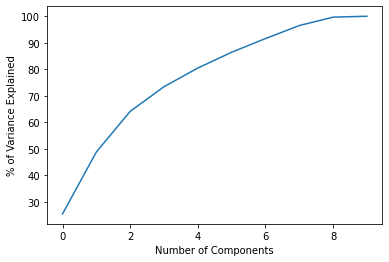

In [40]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

After the 8th component there is a breaking point i guess, so i look at the first 8 component.

In [41]:
X_values = StandardScaler().fit_transform(X_values)
pca = PCA(n_components=8)
principalComponents=pca.fit_transform(X_values)

In [42]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.25473165 0.23350911 0.15323139 0.09289836 0.07032378 0.05946849
 0.05164429 0.04906158]
[25.47 48.82 64.14 73.43 80.46 86.41 91.57 96.48]


Text(0, 0.5, '% of Variance Explained')

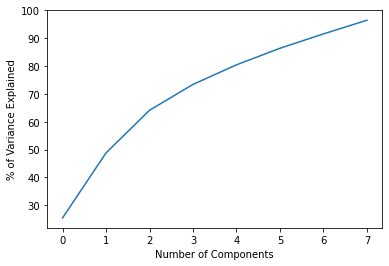

In [43]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

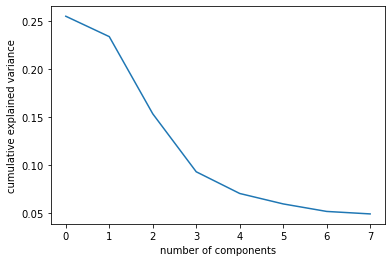

In [44]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

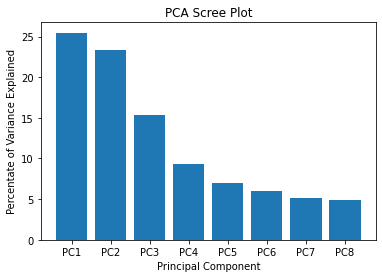

In [45]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8']
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [46]:
X = pd.DataFrame(X_values, columns=X_type.columns)

In [47]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

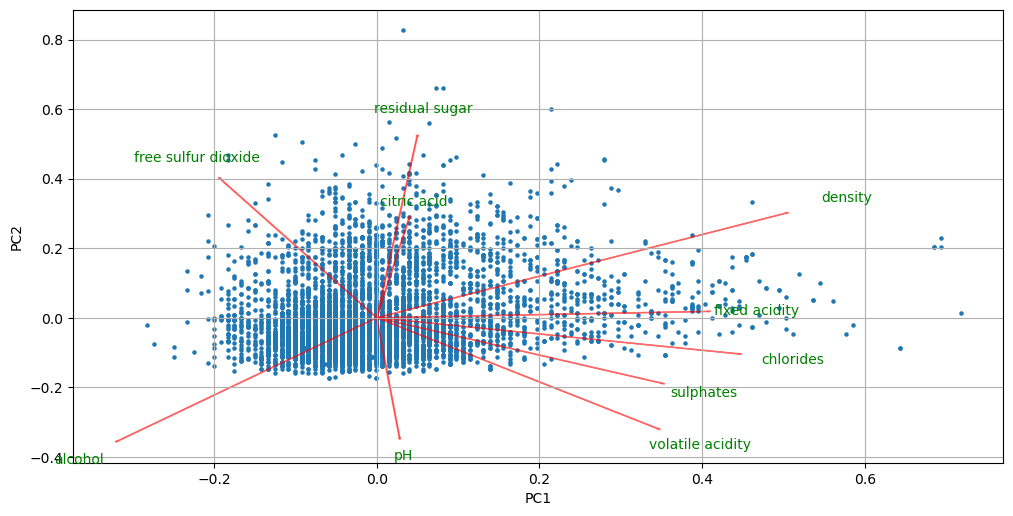

In [48]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

I tried to apply PCA to our model and I decided not to reduce dimension since I don't have a large dimension. And i also tried to exlude some features but our stats before didn't seem to change so i gave up on PCA for this dataset.

Now its time for regression part.

For regression part, our target variable type is not continuous, it is discreate. I search online that there are 4 types of regression:

1)Linear regression(for continuous type)

2)Logistic Regression (binary type)

3)Poisson regression (count/rate)

4)Survival analysis(time to event)

So now, i will try to apply Poisson regression.

Before we go and appy Poisson, let us look at the distribution of 'quality.'

In [49]:
wine_quality.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Rated 3 : %0.46
Rated 4 : %3.32
Rated 5 : %32.91
Rated 6 : %43.65
Rated 7 : %16.61
Rated 8 : %2.97
Rated 9 : %0.08


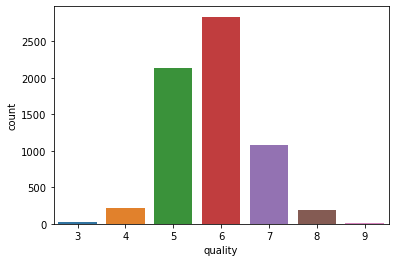

In [50]:
sns.countplot(wine_quality['quality'])

print("Rated 3 : %{:.2f}".format(sum(wine_quality['quality']==3)/len(wine_quality.quality)*100))
print("Rated 4 : %{:.2f}".format(sum(wine_quality['quality']==4)/len(wine_quality.quality)*100))
print("Rated 5 : %{:.2f}".format(sum(wine_quality['quality']==5)/len(wine_quality.quality)*100))
print("Rated 6 : %{:.2f}".format(sum(wine_quality['quality']==6)/len(wine_quality.quality)*100))
print("Rated 7 : %{:.2f}".format(sum(wine_quality['quality']==7)/len(wine_quality.quality)*100))
print("Rated 8 : %{:.2f}".format(sum(wine_quality['quality']==8)/len(wine_quality.quality)*100))
print("Rated 9 : %{:.2f}".format(sum(wine_quality['quality']==9)/len(wine_quality.quality)*100))

We can see that our data is imbalanced so when we create our model, it will mainly make predictions around 5-7. Let us observe that.

In [51]:
y_quality=wine_quality['quality']
X_quality=wine_quality.drop(['quality'],axis=1)

In [52]:
from patsy import dmatrices
import statsmodels.api as sms

In [53]:
X_train_quality,X_test_quality,y_train_quality,y_test_quality=train_test_split(X_quality,y_quality,test_size=0.2,random_state=0)

In [54]:
poisson_training_results = sms.GLM(y_train_quality, X_train_quality, family=sms.families.Poisson()).fit()

In [55]:
display(poisson_training_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 5197
Model:                            GLM   Df Residuals:                     5186
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9640.8
Date:                Wed, 16 Feb 2022   Deviance:                       485.56
Time:                        21:49:31   Pearson chi2:                     481.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity           0.0001      0.007      0.019      0.985      -0.013       0.013
volatile acidity       -0.2898      0.051     -5.649      0.000      -0.390      -0.189
citric acid            -0.0292      0.051     -0.574      0.566      -0.129       0.071
residual sugar          0.0034      0.002      2.217      0.027       0.000       0.006
chlorides              -0.2127      0.218     -0.977      0.329      -0.639       0.214
free sulfur dioxide     0.0005      0.000      1.273      0.203      -0.000       0.001
density                 1.1354      0.199      5.716      0.000       0.746       1.525
pH                      0.0189      0.046      0.412      0.681      -0.071       0.109
sulphates               0.0912      0.045      2.013      0.044       0.002       0.180
alcohol                 0.0608      0.005     11.059      0.000       0.050       0.072
Wine Type              -0.0433      0.026     -1.694      0.090      -0.093       0.007
=======================================================================================
"""

In [56]:
poisson_predictions = poisson_training_results.get_prediction(X_test_quality)
predictions_summary_frame = poisson_predictions.summary_frame()
display(predictions_summary_frame)

,mean,mean_se,mean_ci_lower,mean_ci_upper
5316,5.484754,0.089146,5.312785,5.662290
5210,6.288918,0.094792,6.105846,6.477478
3518,5.731286,0.096838,5.544595,5.924263
1622,4.752143,0.119276,4.524024,4.991764
2443,6.068674,0.071480,5.930181,6.210402
...,...,...,...,...
5710,6.159962,0.084170,5.997181,6.327162
6475,6.049456,0.089150,5.877224,6.226735
1433,5.772739,0.113194,5.555091,5.998914
2707,6.480021,0.091271,6.303580,6.661401


Let us try upsampling.

In [57]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_quality, y_train_quality)

LogisticRegression()

In [58]:
Rated_6 = wine_quality[wine_quality.quality == 6]
Rated_5 = wine_quality[wine_quality.quality == 5]
Rated_4 = wine_quality[wine_quality.quality == 4]
Rated_3 = wine_quality[wine_quality.quality == 3]
Rated_9 = wine_quality[wine_quality.quality == 9]
Rated_8 = wine_quality[wine_quality.quality == 8]
Rated_7 = wine_quality[wine_quality.quality == 7]

Rated_5_upsampled = resample(Rated_5,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)
Rated_4_upsampled = resample(Rated_4,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)
Rated_3_upsampled = resample(Rated_3,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)
Rated_9_upsampled = resample(Rated_9,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)
Rated_8_upsampled = resample(Rated_8,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)
Rated_7_upsampled = resample(Rated_7,
                                         replace = True,
                                         n_samples = len(Rated_6),
                                         random_state = 111)


upsampled_df_rate = pd.concat([Rated_6,Rated_5_upsampled,Rated_4_upsampled,Rated_3_upsampled,Rated_9_upsampled,Rated_8_upsampled,Rated_7_upsampled])
upsampled_df_rate.quality.value_counts()

3    2836
4    2836
5    2836
6    2836
7    2836
8    2836
9    2836
Name: quality, dtype: int64

In [59]:
X_quality_up=upsampled_df_rate.drop('quality', axis=1)
y_quality_up=upsampled_df_rate['quality']

In [60]:
X_train_up,X_test_up,y_train_up,y_test_up=train_test_split(X_quality_up,y_quality_up,test_size=0.2,random_state=0)

In [61]:
poisson_training_results_up = sms.GLM(y_train_up, X_train_up, family=sms.families.Poisson()).fit()

In [62]:
display(poisson_training_results_up.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                15881
Model:                            GLM   Df Residuals:                    15870
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31611.
Date:                Wed, 16 Feb 2022   Deviance:                       6063.4
Time:                        21:49:33   Pearson chi2:                 5.68e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity           0.0116      0.004      3.168      0.002       0.004       0.019
volatile acidity       -0.6168      0.026    -23.701      0.000      -0.668      -0.566
citric acid             0.0954      0.032      2.992      0.003       0.033       0.158
residual sugar          0.0115      0.001     12.907      0.000       0.010       0.013
chlorides              -1.1487      0.142     -8.094      0.000      -1.427      -0.870
free sulfur dioxide    -0.0005      0.000     -3.766      0.000      -0.001      -0.000
density                -0.2097      0.110     -1.903      0.057      -0.426       0.006
pH                      0.2015      0.026      7.712      0.000       0.150       0.253
sulphates               0.1515      0.026      5.734      0.000       0.100       0.203
alcohol                 0.1301      0.003     44.188      0.000       0.124       0.136
Wine Type              -0.0508      0.015     -3.419      0.001      -0.080      -0.022
=======================================================================================
"""

In [63]:
poisson_predictions_up = poisson_training_results_up.get_prediction(X_test_quality)
predictions_summary_frame_up = poisson_predictions_up.summary_frame()
display(predictions_summary_frame_up)

,mean,mean_se,mean_ci_lower,mean_ci_upper
5316,4.935531,0.046690,4.844863,5.027895
5210,6.658379,0.060057,6.541704,6.777135
3518,5.659299,0.060264,5.542409,5.778655
1622,3.492161,0.046441,3.402315,3.584380
2443,6.428037,0.040769,6.348626,6.508442
...,...,...,...,...
5710,6.558071,0.049236,6.462277,6.655285
6475,6.440726,0.047424,6.348444,6.534349
1433,5.375952,0.064548,5.250917,5.503965
2707,7.452375,0.051918,7.351310,7.554830


Trying SMOTE.

In [64]:
sm = SMOTE('not minority')
X_train_smote_quality, y_train_smote_quality = sm.fit_resample(X_train_quality, y_train_quality)

In [65]:
poisson_training_results_smote = sms.GLM(y_train_smote_quality, X_train_smote_quality, family=sms.families.Poisson()).fit()

In [66]:
display(poisson_training_results_smote.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                13546
Model:                            GLM   Df Residuals:                    13535
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26063.
Date:                Wed, 16 Feb 2022   Deviance:                       4394.4
Time:                        21:49:34   Pearson chi2:                 4.23e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity          -0.0047      0.004     -1.042      0.297      -0.013       0.004
volatile acidity       -0.5734      0.029    -20.058      0.000      -0.629      -0.517
citric acid            -0.0630      0.037     -1.695      0.090      -0.136       0.010
residual sugar          0.0075      0.001      7.207      0.000       0.005       0.010
chlorides              -0.8731      0.145     -6.042      0.000      -1.156      -0.590
free sulfur dioxide    -0.0007      0.000     -3.909      0.000      -0.001      -0.000
density                 0.6329      0.131      4.825      0.000       0.376       0.890
pH                     -0.0128      0.031     -0.405      0.685      -0.074       0.049
sulphates               0.4489      0.030     14.840      0.000       0.390       0.508
alcohol                 0.1054      0.004     29.985      0.000       0.098       0.112
Wine Type               0.0631      0.013      4.691      0.000       0.037       0.090
=======================================================================================
"""

In [67]:
poisson_predictions_smote = poisson_training_results_smote.get_prediction(X_test_quality)
predictions_summary_frame_smote = poisson_predictions_smote.summary_frame()
display(predictions_summary_frame_smote)

,mean,mean_se,mean_ci_lower,mean_ci_upper
5316,5.325844,0.057250,5.214810,5.439242
5210,6.661477,0.068485,6.528593,6.797067
3518,5.627897,0.068449,5.495325,5.763667
1622,3.905602,0.056416,3.796580,4.017756
2443,6.178871,0.048823,6.083916,6.275308
...,...,...,...,...
5710,6.613002,0.056419,6.503342,6.724510
6475,6.190087,0.056524,6.080287,6.301869
1433,5.261472,0.063504,5.138467,5.387422
2707,7.212065,0.059076,7.097202,7.328786


I wanted to apply one more algorithm since i didn't get results i wanted yet. So here i will apply ADASYN.

In [68]:
ad = ADASYN(sampling_strategy='not minority')
X_train_adasyn, y_train_adasyn = ad.fit_resample(X_train_quality, y_train_quality)

In [69]:
poisson_training_results_adasyn = sms.GLM(y_train_adasyn, X_train_adasyn, family=sms.families.Poisson()).fit()

In [70]:
display(poisson_training_results_adasyn.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                13404
Model:                            GLM   Df Residuals:                    13393
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25794.
Date:                Wed, 16 Feb 2022   Deviance:                       4272.9
Time:                        21:49:35   Pearson chi2:                 4.11e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity          -0.0026      0.004     -0.578      0.563      -0.011       0.006
volatile acidity       -0.5755      0.029    -19.787      0.000      -0.633      -0.519
citric acid            -0.0035      0.038     -0.094      0.925      -0.077       0.070
residual sugar          0.0051      0.001      4.737      0.000       0.003       0.007
chlorides              -0.9265      0.151     -6.141      0.000      -1.222      -0.631
free sulfur dioxide    -0.0005      0.000     -2.585      0.010      -0.001      -0.000
density                 0.3962      0.131      3.014      0.003       0.139       0.654
pH                      0.0353      0.031      1.125      0.261      -0.026       0.097
sulphates               0.4457      0.030     14.733      0.000       0.386       0.505
alcohol                 0.1106      0.004     31.066      0.000       0.104       0.118
Wine Type               0.0654      0.013      4.927      0.000       0.039       0.091
=======================================================================================
"""

In [71]:
poisson_predictions_adasyn = poisson_training_results_adasyn.get_prediction(X_test_quality)
predictions_summary_frame_adasyn = poisson_predictions_adasyn.summary_frame()
display(predictions_summary_frame_adasyn)

,mean,mean_se,mean_ci_lower,mean_ci_upper
5316,5.237430,0.057587,5.125770,5.351523
5210,6.707855,0.069396,6.573212,6.845256
3518,5.556085,0.068945,5.422586,5.692871
1622,3.833391,0.056067,3.725062,3.944870
2443,6.271286,0.049134,6.175721,6.368329
...,...,...,...,...
5710,6.673660,0.057183,6.562519,6.786683
6475,6.343384,0.058032,6.230657,6.458150
1433,5.234776,0.063651,5.111496,5.361029
2707,7.300552,0.059762,7.184355,7.418628


We can see that our predictions are more accurate when we try different algorithms.

Now let us compare the results.

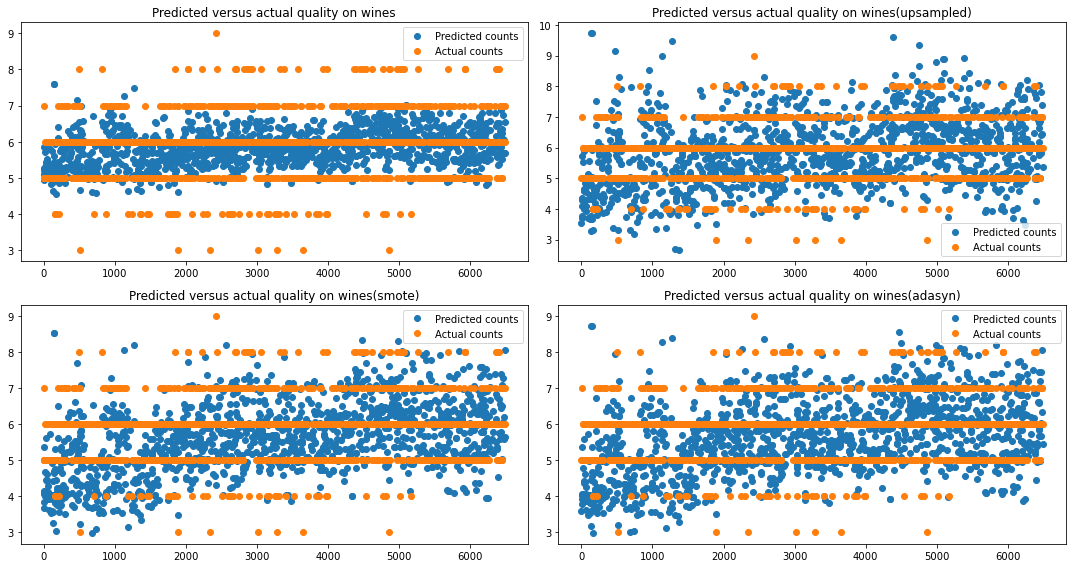

In [72]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test_quality
plt.title('Predicted versus actual quality on wines')
predicted, = plt.plot(X_test_quality.index, predicted_counts, 'o', label='Predicted counts')
actual, = plt.plot(X_test_quality.index, actual_counts, 'o', label='Actual counts')
plt.legend(handles=[predicted, actual])

plt.subplot(2,2,2)
predicted_counts_up=predictions_summary_frame_up['mean']
actual_counts_up = y_test_quality
plt.title('Predicted versus actual quality on wines(upsampled)')
predicted_up, = plt.plot(X_test_quality.index, predicted_counts_up, 'o', label='Predicted counts')
actual_up, = plt.plot(X_test_quality.index, actual_counts_up, 'o', label='Actual counts')
plt.legend(handles=[predicted_up, actual_up])

plt.subplot(2,2,3)
predicted_counts_smote=predictions_summary_frame_smote['mean']
actual_counts_smote = y_test_quality
plt.title('Predicted versus actual quality on wines(smote)')
predicted_smote, = plt.plot(X_test_quality.index, predicted_counts_smote, 'o', label='Predicted counts')
actual_smote, = plt.plot(X_test_quality.index, actual_counts_smote, 'o', label='Actual counts')
plt.legend(handles=[predicted_smote, actual_smote])

plt.subplot(2,2,4)
predicted_counts_adasyn=predictions_summary_frame_adasyn['mean']
actual_counts_adasyn = y_test_quality
plt.title('Predicted versus actual quality on wines(adasyn)')
predicted_adasyn, = plt.plot(X_test_quality.index, predicted_counts_adasyn, 'o', label='Predicted counts')
actual_adasyn, = plt.plot(X_test_quality.index, actual_counts_adasyn, 'o', label='Actual counts')
plt.legend(handles=[predicted_adasyn, actual_adasyn])

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

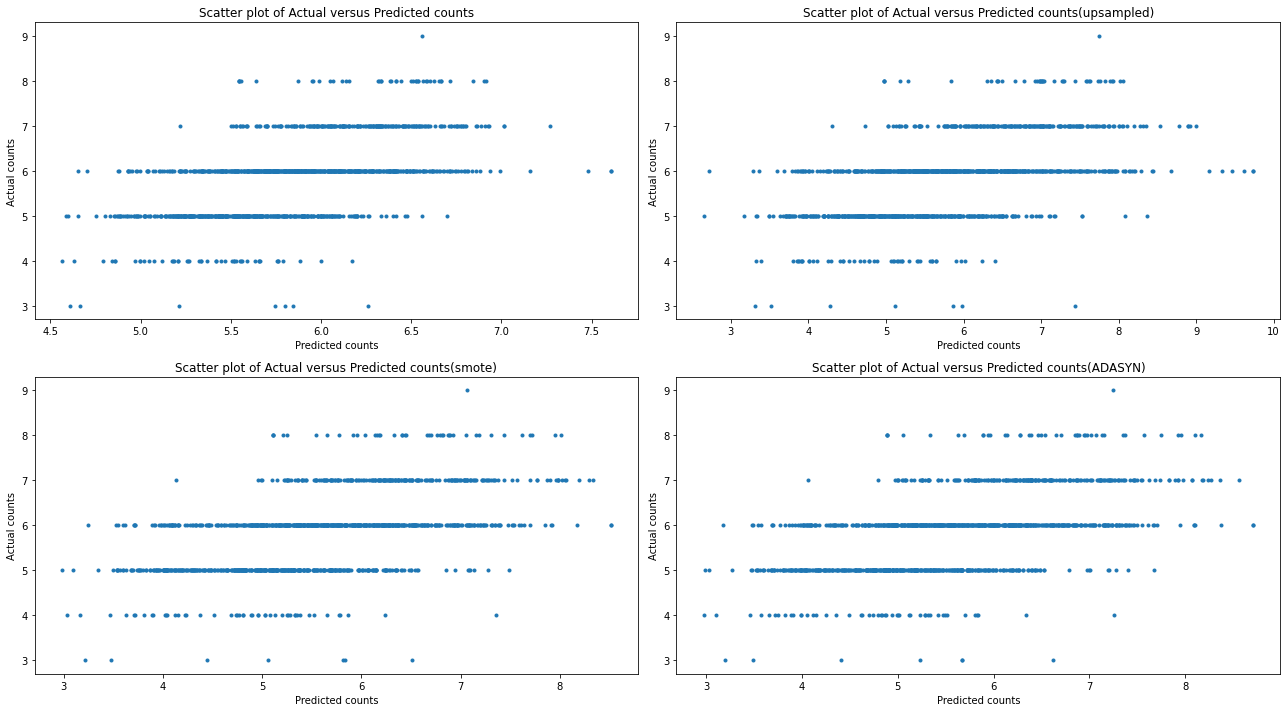

In [73]:
plt.clf()
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.title('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')

plt.subplot(2,2,2)
plt.title('Scatter plot of Actual versus Predicted counts(upsampled)')
plt.scatter(x=predicted_counts_up, y=actual_counts_up, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')

plt.subplot(2,2,3)
plt.title('Scatter plot of Actual versus Predicted counts(smote)')
plt.scatter(x=predicted_counts_smote, y=actual_counts_smote, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')

plt.subplot(2,2,4)
plt.title('Scatter plot of Actual versus Predicted counts(ADASYN)')
plt.scatter(x=predicted_counts_adasyn, y=actual_counts_adasyn, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')



plt.tight_layout()
plt.show()

As we see from the figures, our first model predicted values around mostly 5-7. As we applied different algorithms, we can see that our predictions are distributed around 3-9. To conclude this part, i would choose ADASYN because they seem more accurate. 

In [81]:
pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached grpcio-1.43.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
Note: you may need to restart the kernel to use updated 

In [139]:
from tensorflow.keras.datasets import mnist
print("Shape of train set (X) :", X_train_quality.shape)
print("Shape of train set (y) :", y_train_quality.shape)
print("Shape of test set  (X) :", X_test_quality.shape)
print("Shape of test set  (y) :", y_test_quality.shape)

Shape of train set (X) : (5197, 11)
Shape of train set (y) : (5197,)
Shape of test set  (X) : (1300, 11)
Shape of test set  (y) : (1300,)


In [141]:
input_number = X_train_quality.shape[1]

In [142]:
mnist_model = Sequential()
mnist_model.add(Dense(32,
                      activation='relu', 
                      input_shape = (input_number,), 
                      name = "Hidden_Layer_1"))
mnist_model.add(Dense(8,
                      activation='relu', 
                      name = "Hidden_Layer_2"))
mnist_model.add(Dense(10,
                      activation='softmax',
                      name = "Output"))

In [143]:
mnist_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 32)                384       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 264       
                                                                 
 Output (Dense)              (None, 10)                90        
                                                                 
Total params: 738
Trainable params: 738
Non-trainable params: 0
_________________________________________________________________


In [144]:
mnist_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_quality, 10)
y_test_categorical = to_categorical(y_test_quality, 10)

print("Shape of target : ", y_train_categorical.shape)

Shape of target :  (5197, 10)


In [148]:
mnist_model.fit(X_train_quality, y_train_categorical, epochs=20, verbose=0)

In [149]:
accuracy_train = mnist_model.evaluate(X_train_quality, y_train_categorical, verbose = 0)[1]
accuracy_test = mnist_model.evaluate(X_test_quality, y_test_categorical, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("\nAccuracy for train set : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.440

Accuracy for train set : 0.458
